In [19]:
import pandas as pd
import pandas as pd
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import pandas as pd
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
data = pd.read_csv('/home/kasun/Desktop/consumer-behavior-prediction/data.csv')

In [21]:
# handle missing  values
data = data.dropna() 

In [22]:
data

,age,gender,isMarried,race,religion,color,priceRange,district,imagePath
0,30-35,male,True,Tamil,Hindu,Cream,0-2000,Kandy,4
1,20-25,male,False,Sinhala,Buddhism,Yellow,0-2000,Kurunegala,2
2,20-25,male,False,Sinhala,Buddhism,Brown,0-2000,Kurunegala,1
3,20-25,male,False,Sinhala,Buddhism,Brown,0-2000,Kurunegala,1
4,20-25,male,False,Sinhala,Buddhism,Yellow,0-2000,Kurunegala,2
...,...,...,...,...,...,...,...,...,...
6060,25-30,male,False,Sinhala,Catholic,Cream,0-2000,Kalutara,4
6061,25-30,male,True,Sinhala,Catholic,Cream,0-2000,Kandy,4
6062,25-30,female,True,Sinhala,Buddhism,Gray,4000-6000,Gampaha,21
6063,25-30,female,False,Tamil,Hindu,Blue,0-2000,Kalutara,14


In [23]:
data.head()

,age,gender,isMarried,race,religion,color,priceRange,district,imagePath
0,30-35,male,True,Tamil,Hindu,Cream,0-2000,Kandy,4
1,20-25,male,False,Sinhala,Buddhism,Yellow,0-2000,Kurunegala,2
2,20-25,male,False,Sinhala,Buddhism,Brown,0-2000,Kurunegala,1
3,20-25,male,False,Sinhala,Buddhism,Brown,0-2000,Kurunegala,1
4,20-25,male,False,Sinhala,Buddhism,Yellow,0-2000,Kurunegala,2


In [25]:
# Descriptive Analysis
total_columns = data.columns
num_cols = data._get_numeric_data().columns
cat_cols = list(set(total_columns)-set(num_col))
print(num_col)
print(cat_col)

Index(['isMarried', 'imagePath'], dtype='object')
['religion', 'district', 'priceRange', 'age', 'race', 'gender', 'color']


In [28]:
categorical_counts = {}
for column in cat_cols:
    value_counts = data[column].value_counts()
    categorical_counts[column] = value_counts
    print(f"Value Counts for {column}:")
    print(value_counts)

Value Counts for religion:
religion
Buddhism    2432
Hindu       1481
Catholic    1088
Islam       1064
Name: count, dtype: int64

Value Counts for district:
district
Gampaha       1275
Kandy         1257
Kurunegala    1205
Colombo       1181
Kalutara      1147
Name: count, dtype: int64

Value Counts for priceRange:
priceRange
2000-4000    3015
0-2000       1779
4000-6000    1023
6000-8000     248
Name: count, dtype: int64

Value Counts for age:
age
25-30    2215
30-35    2040
20-25    1810
Name: count, dtype: int64

Value Counts for race:
race
Sinhala    3172
Tamil      1829
Muslim     1064
Name: count, dtype: int64

Value Counts for gender:
gender
male      3295
female    2770
Name: count, dtype: int64

Value Counts for color:
color
Blue      1526
Brown     1263
Cream      768
Gray       767
Black      502
Pink       490
Red        259
Yellow     253
White      237
Name: count, dtype: int64



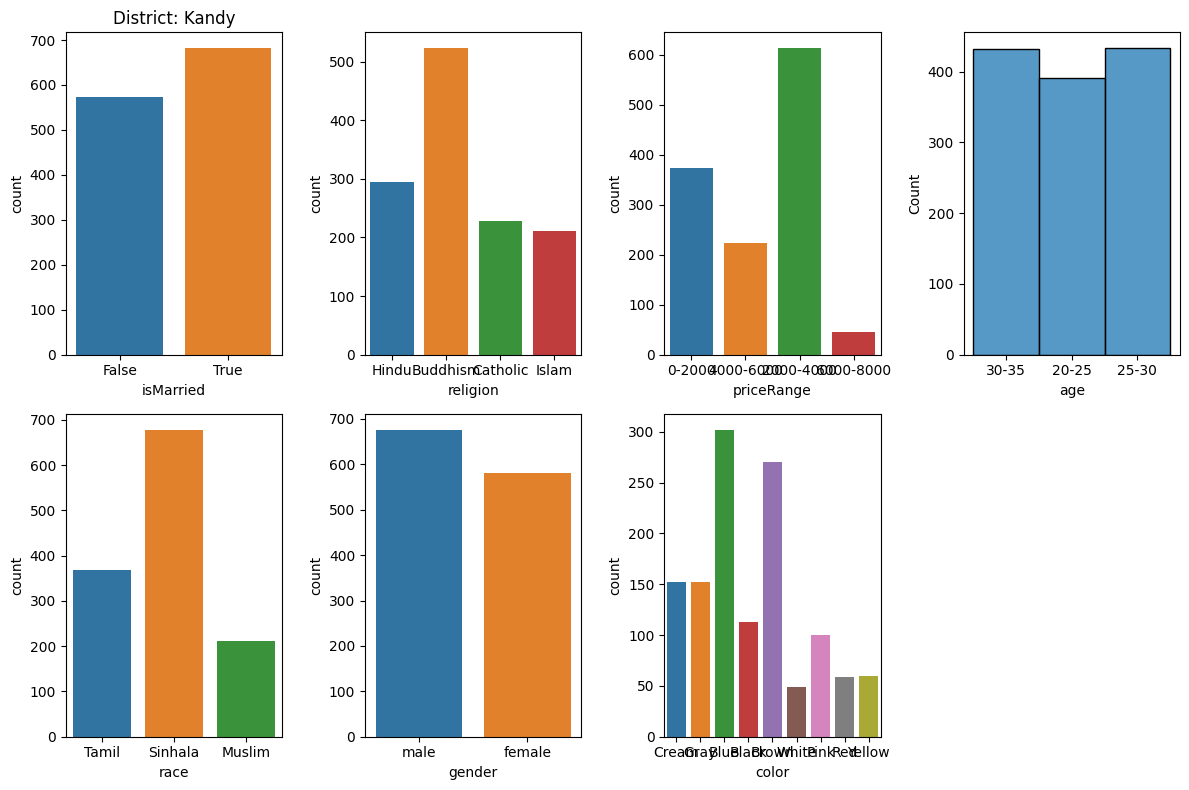

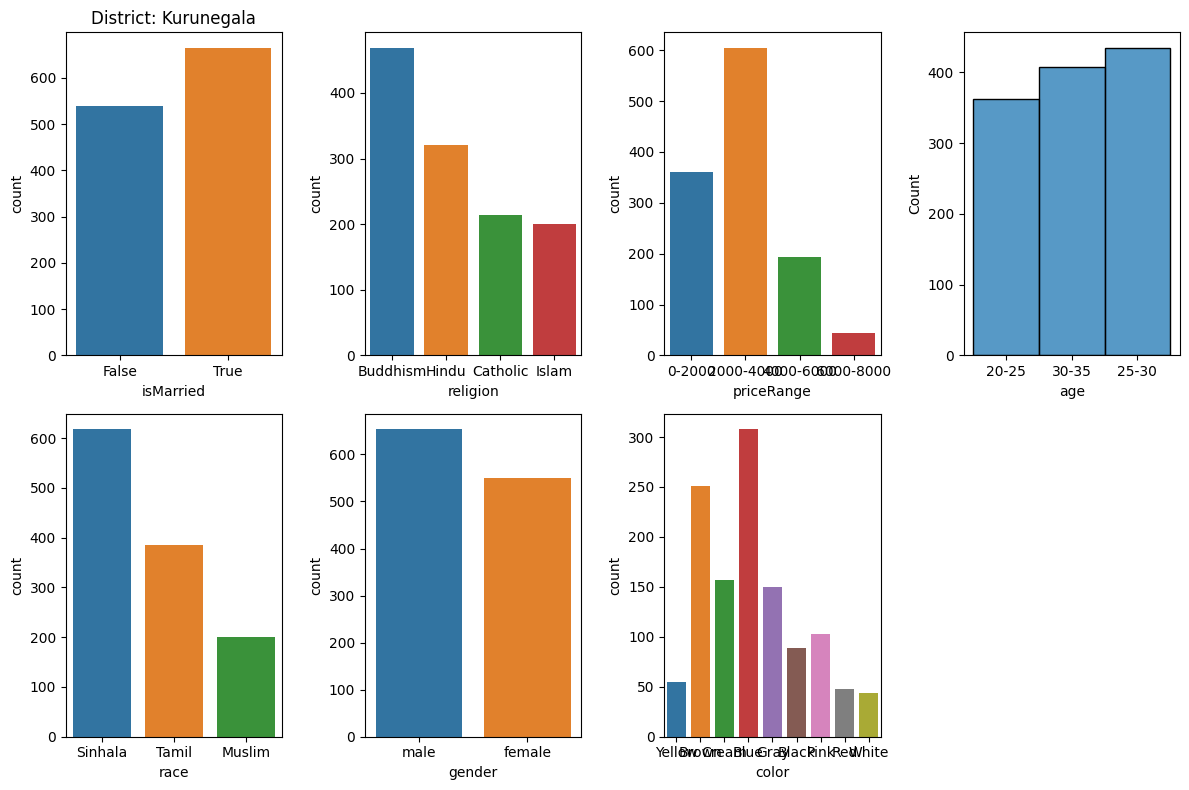

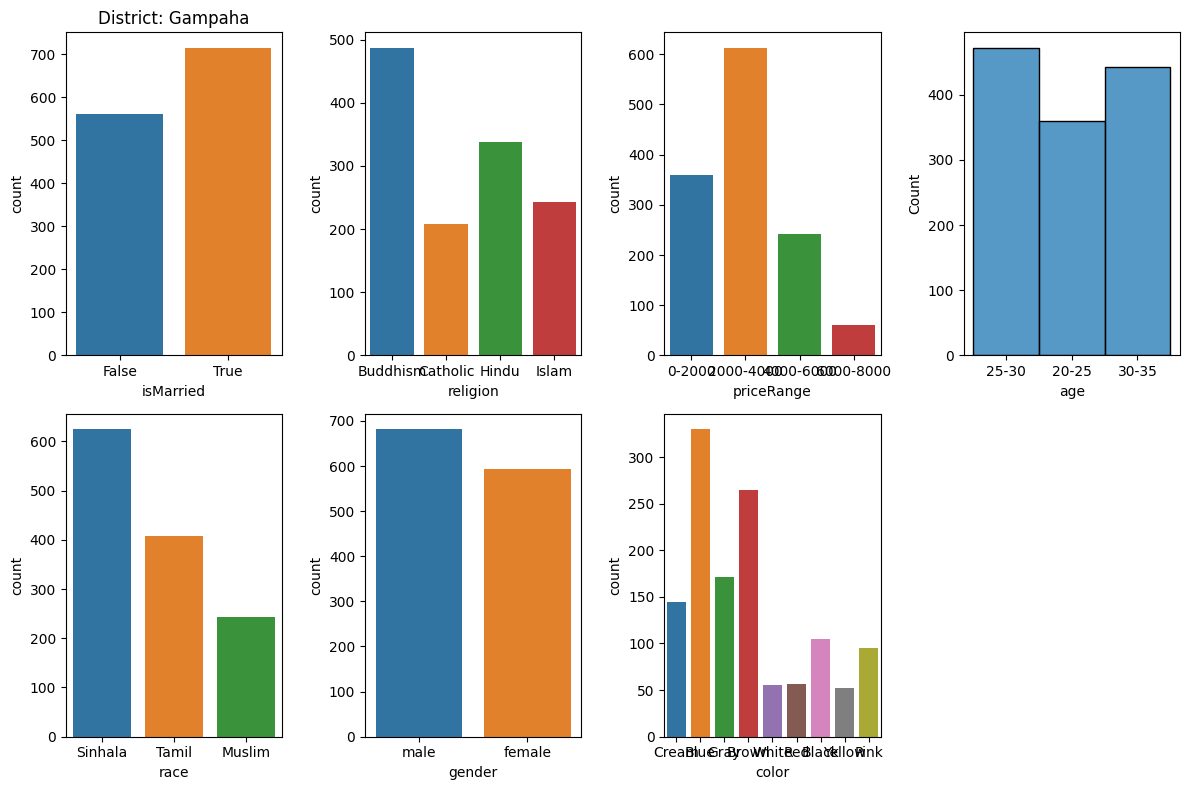

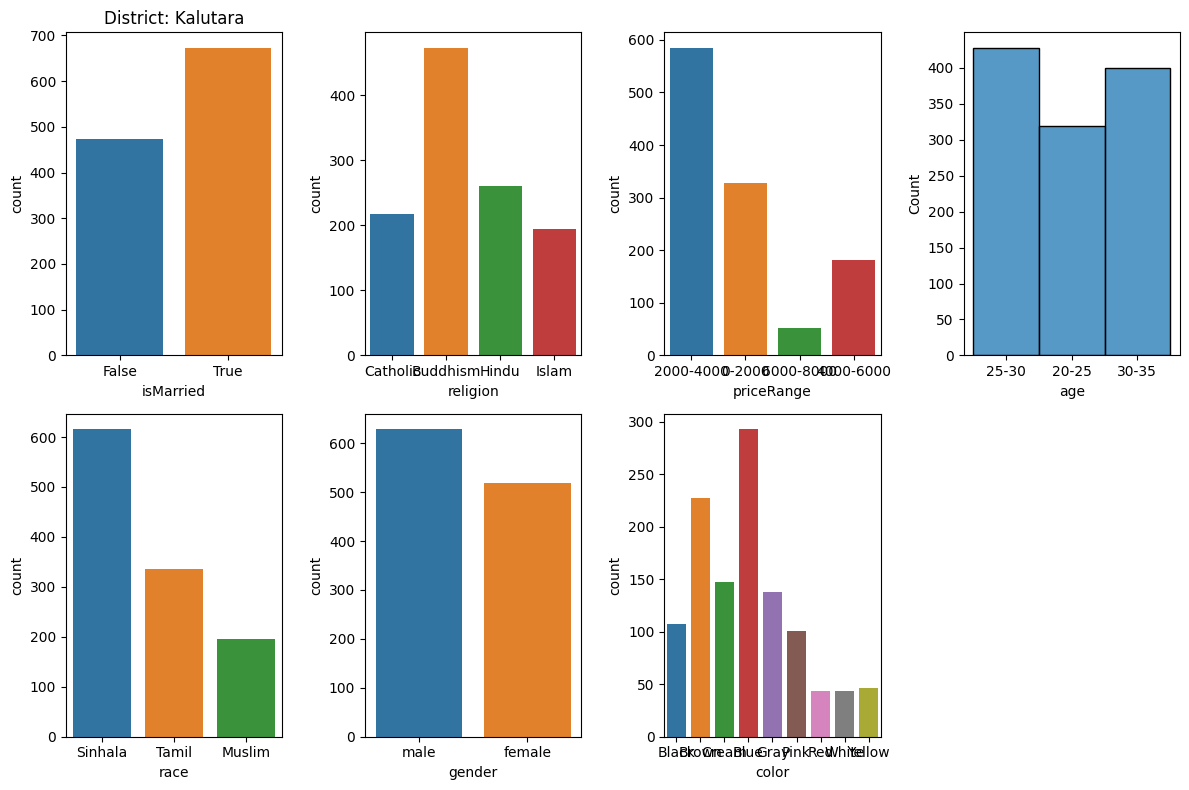

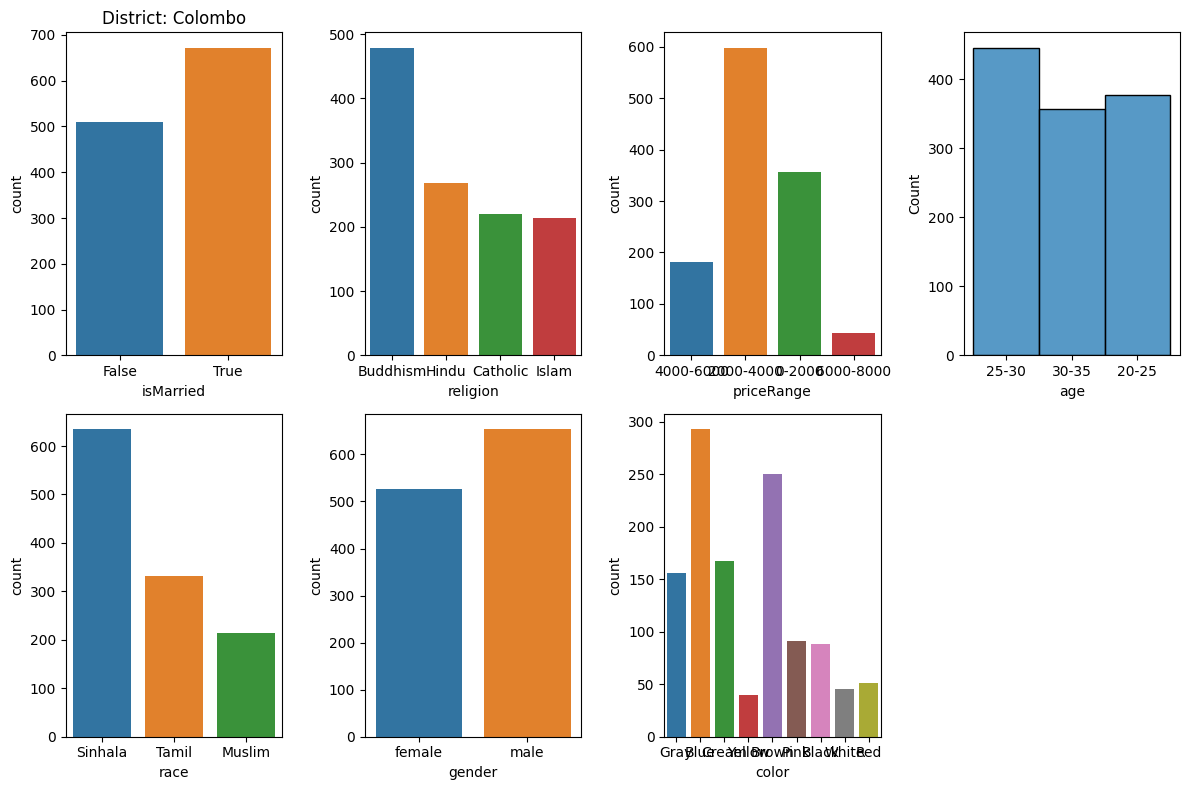

In [43]:
# Create bar plots for categorical columns
for district_value in data['district'].unique():
    # Create a subplot for each district
    plt.figure(figsize=(12, 8))
    
    # Filter the data for the current district
    district_data = data[data['district'] == district_value]
    
    # Plot 'isMarried' distribution
    plt.subplot(2, 4, 1)
    sns.countplot(data=district_data, x='isMarried')
    plt.title(f'District: {district_value}')
    
    # Plot 'religion' distribution
    plt.subplot(2, 4, 2)
    sns.countplot(data=district_data, x='religion')
    
    # Plot 'priceRange' distribution
    plt.subplot(2, 4, 3)
    sns.countplot(data=district_data, x='priceRange')
    
    # Plot 'age' distribution
    plt.subplot(2, 4, 4)
    sns.histplot(data=district_data, x='age', bins=10)
    
    # Plot 'race' distribution
    plt.subplot(2, 4, 5)
    sns.countplot(data=district_data, x='race')
    
    # Plot 'gender' distribution
    plt.subplot(2, 4, 6)
    sns.countplot(data=district_data, x='gender')
    
    # Plot 'color' distribution
    plt.subplot(2, 4, 7)
    sns.countplot(data=district_data, x='color')
    
    plt.tight_layout()
    plt.show()

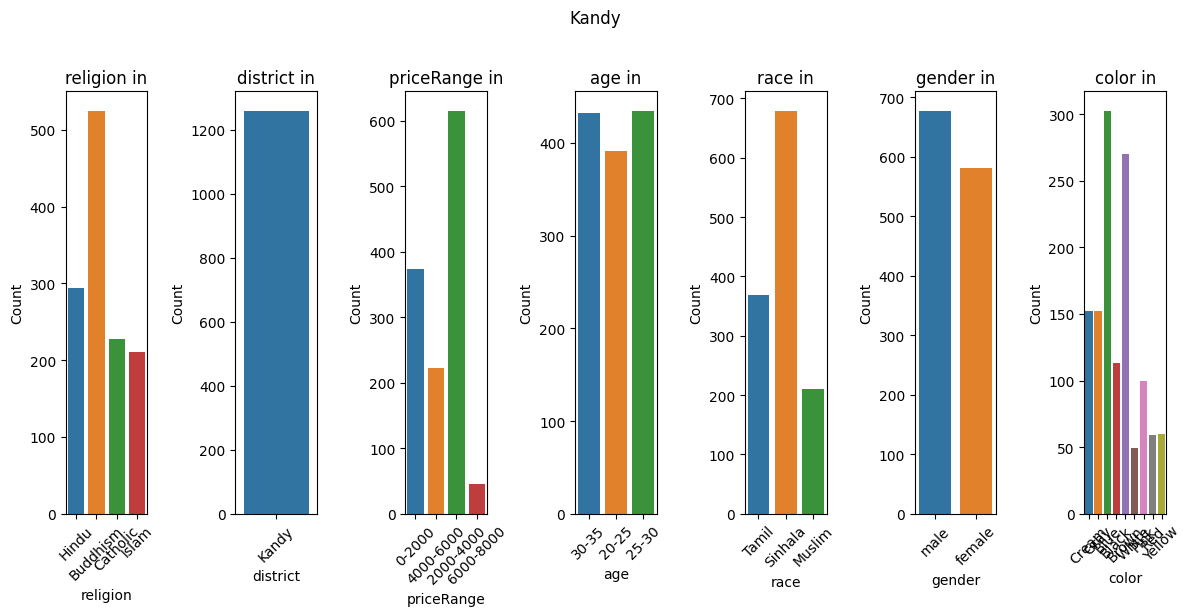

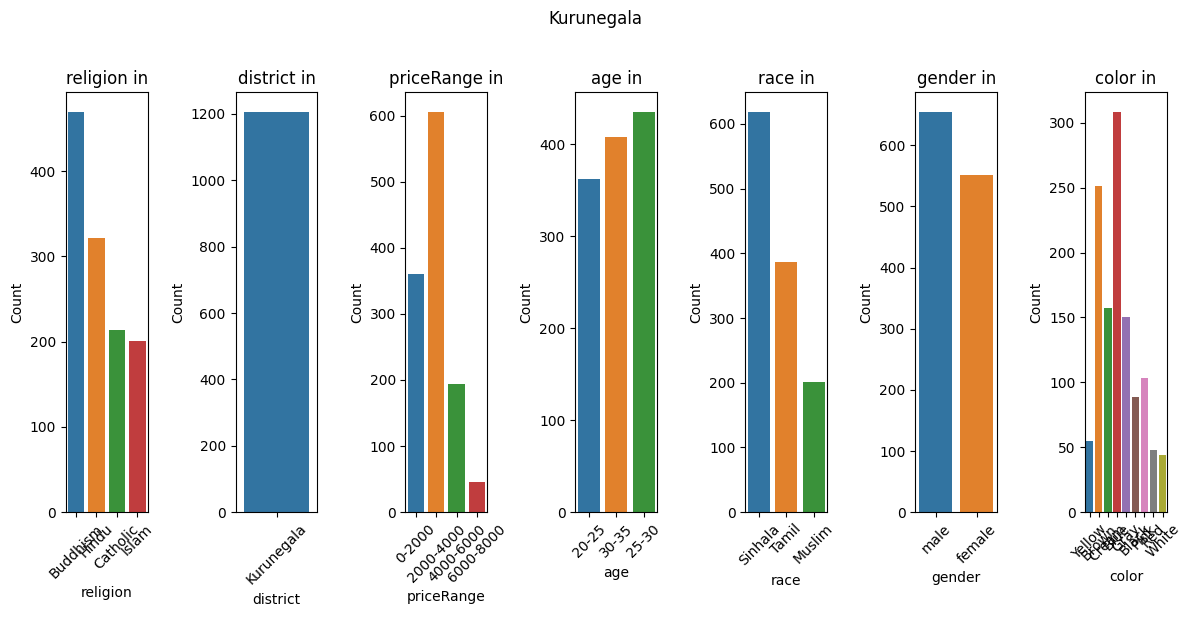

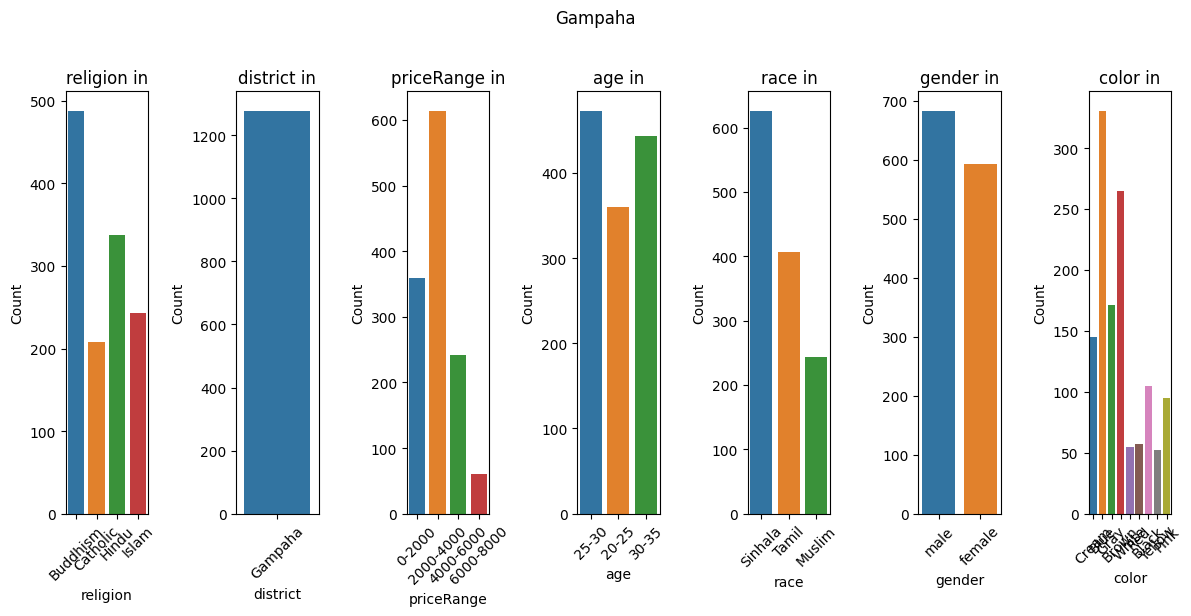

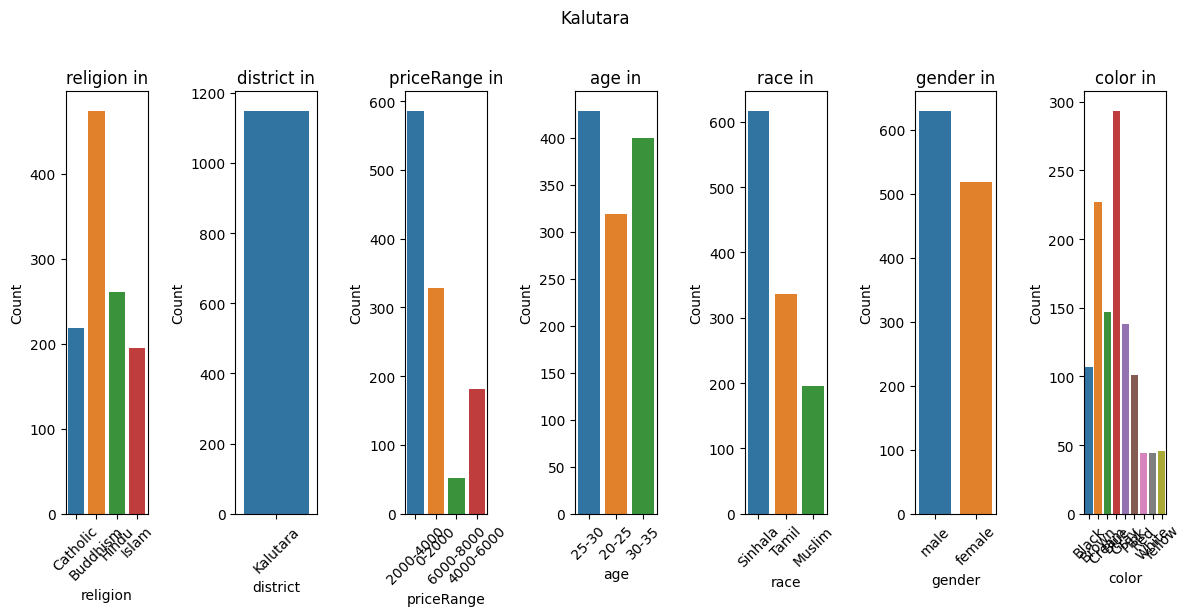

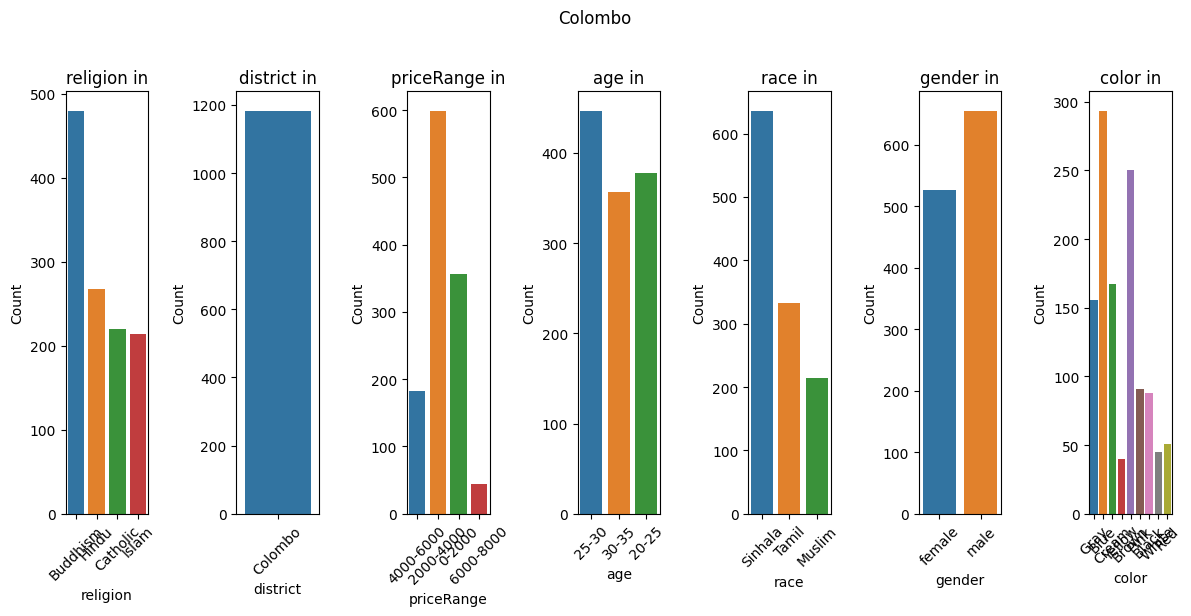

In [42]:
for district in data['district'].unique():
    plt.figure(figsize=(12, 6))
    for i, column in enumerate(cat_cols, 1):
        plt.subplot(1, len(cat_cols), i)
        sns.countplot(data=data[data['district'] == district], x=column)
        plt.title(f'{column} in')  # Remove {district} from title
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
    
    plt.suptitle(f'{district}', y=1.02)  # Add district name above the subplots
    plt.tight_layout()
    plt.show()

In [4]:
features = ['age', 'gender', 'price']

In [5]:
# Convert categorical variables into numerical representations
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False)

In [6]:
# Encode gender column as 1 for male and 0 for female
data['gender'] = data['gender'].apply(lambda x: 1 if x.lower() == 'male' else 0)

In [7]:
# Preprocess age column
age_range = data['age'].str.split('-', expand=True)
data['age'] = age_range.mean(axis=1).astype(float)

In [8]:
# Preprocess price column
price_range = data['price'].str.split('-', expand=True)
data['price'] = price_range.mean(axis=1).astype(float)

In [9]:
# Normalize numerical features
scaler = MinMaxScaler()
data['age'] = scaler.fit_transform(data[['age']])
data['price'] = scaler.fit_transform(data[['price']])

In [10]:
# Split the data into training and testing sets
X = data[features]
y = data['imagePath']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Select and train the machine learning algorithm
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [12]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5245901639344263


In [381]:
# Make predictions on new data
new_data = pd.DataFrame({
    'age': [30],
    'gender': ['male'],
    'price': ['0-1000'],
})

In [382]:
# Preprocess the remaining columns in the new data
new_data['gender'] = new_data['gender'].apply(lambda x: 1 if x == 'male' else 0)
new_data['price'] = new_data['price'].astype(str).str.split('-', expand=True).mean(axis=1).astype(float)

# Normalize numerical features
new_data[['age', 'price']] = scaler.transform(new_data[['age', 'price']])

# Make predictions on the new data
new_data_predictions = model.predict(new_data)

# Print the predictions
print(new_data_predictions)


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- age


In [383]:
# Make predictions on the data
predictions = model.predict(data)

# Print the predictions
print(predictions)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- imagePath
